In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogimage/2565248.jpg
/kaggle/input/catimage/th.jpeg
/kaggle/input/datasetimage/IMG_90241.jpg
/kaggle/input/datasetimage/The-Origins-and-History-of-the-Tabby-Cat.jpg
/kaggle/input/datasetimage/th.jpeg
/kaggle/input/cat-and-dog-classification/tensorflow2/default/1/cnn.h5


# **Cat and Dog Classifition through CNN Model**

# **Step:1 Import Libraries** 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,BatchNormalization,Dropout
from keras.models import Sequential
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
from keras.preprocessing import image
# Suppress all warnings
warnings.filterwarnings('ignore')


# **Step:2 Downloade the Dataset from kaggle**

In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100%|█████████████████████████████████████▉| 1.06G/1.06G [00:37<00:00, 33.2MB/s]
100%|██████████████████████████████████████| 1.06G/1.06G [00:37<00:00, 30.8MB/s]


# **Step 3: Unzip the Dataset**

In [7]:
import os
import zipfile

# Path to the downloaded zip file
local_zip = '/kaggle/working/dogs-vs-cats.zip'

# Directory where the dataset will be extracted
extract_dir = '/kaggle/working/'

# Create the directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(local_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Dataset extracted to {extract_dir}")

Dataset extracted to /kaggle/working/


# **Step 4: Data Preprocessing**

In [9]:

# Data Preprocessing
main_path='//kaggle/working/dogs_vs_cats'

train_df_path='/kaggle/working/train'
test_df_path='/kaggle/working/test'
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('/kaggle/working/train',
                                                    target_size=(256, 256),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory('/kaggle/working/test',
                                                              target_size=(256, 256),
                                                              batch_size=32,
                                                              class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


# **Step 5: Build The Model**

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256,256,3))),
model.add(MaxPooling2D(2, 2)),
model.add(Conv2D(64, (3, 3), activation='relu')),
model.add(MaxPooling2D(2, 2)),
model.add(Conv2D(128, (3, 3), activation='relu')),
model.add(MaxPooling2D(2, 2)),
model.add(Conv2D(128, (3, 3), activation='relu')),
model.add(MaxPooling2D(2, 2)),
model.add(Flatten()),
model.add(Dropout(0.5)),
model.add(Dense(512, activation='relu')),
model.add(Dense(1, activation='sigmoid'))

model.summary()

# **Step 6: Train and Compile The Model**

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(train_generator,epochs=20,validation_data=validation_generator)

# **Step 7: Save and load the model**

In [13]:

from keras.models import load_model
model=load_model('/kaggle/input/cat-and-dog-classification/tensorflow2/default/1/cnn.h5')

# **Step 7: Evaluate the Model**

In [15]:
loss, accuracy = model.evaluate(test_generator)

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

157/157 ━━━━━━━━━━━━━━━━━━━━ 121s 770ms/step - accuracy: 0.8932 - loss: 0.2457
Test Loss: 0.2260778248310089
Test Accuracy: 0.9074000120162964


# **Step 8: Plot the Model accuracy**

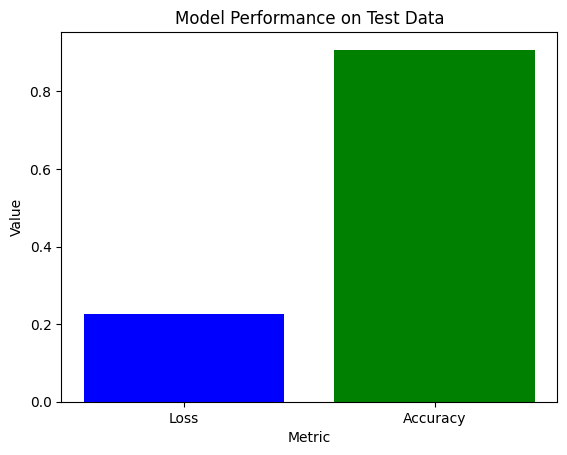

In [16]:
# Since we have only a single evaluation, let's plot a bar chart
fig, ax = plt.subplots()
metrics = ['Loss', 'Accuracy']
values = [loss, accuracy]

ax.bar(metrics, values, color=['blue', 'green'])
ax.set_xlabel('Metric')
ax.set_ylabel('Value')
ax.set_title('Model Performance on Test Data')
plt.show()

# **Step 9: Make a prediction on Test Data**

In [66]:
predictions = model.predict(test_generator) # Get probabilities for each class
predicted_classes = np.argmax(predictions, axis=1) # Extract the class with highest probability

157/157 ━━━━━━━━━━━━━━━━━━━━ 105s 668ms/step


# **Step 10: Make prediction on Unseen Data**

### **Step 1: Preprocess the image**

In [18]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def prepare_image(file):
    img = load_img(file, target_size=(256, 256))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize if you did this during training
    return img_array

### **Step 2: Make Prediction**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


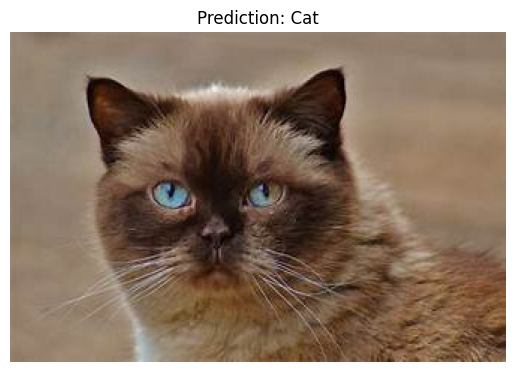

In [23]:
def predict_and_show_image(model, image_path):
    img_array = prepare_image(image_path)
    prediction = model.predict(img_array)
    
    # Assuming binary classification (dog vs. cat)
    if prediction[0] > 0.5:
        label = 'Dog'
    else:
        label = 'Cat'
    
    img = load_img(image_path)
    
    plt.imshow(img)
    plt.title(f'Prediction: {label}')
    plt.axis('off')  # Hide the axis
    plt.show()

image_path = '/kaggle/input/datasetimage/th.jpeg'
predict_and_show_image(model, image_path)